In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline


# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading csv file 
data=pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/2f181ade-814a-430a-b721-769d6a9bf814/Country-data.csv")
# Let's see the head of our master dataset
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking for data duplicacy
sum(data.duplicated(subset = 'country')) == 0

True

As Result showing no Duplicates present in country name

In [4]:
# Check shape of data
data.shape

(167, 10)

In [5]:
#Null Value Checking coulmn wise
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
      ..
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

In [6]:
#Null Value Checking row wise
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Describe dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [9]:
#dropping the na cells
data = data.dropna()

In [10]:
#shape info again
data.shape

(167, 10)

### Checking for Outliers


In [11]:
# Checking for outliers in the continuous variables
num_data = data[['child_mort','inflation','health','life_expec']]

In [12]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,inflation,health,life_expec
count,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7.781832,6.815689,70.555689
std,40.328931,10.570704,2.746837,8.893172
min,2.600000,-4.210000,1.810000,32.100000
25%,8.250000,1.810000,4.920000,65.300000
50%,19.300000,5.390000,6.320000,73.100000
75%,62.100000,10.750000,8.600000,76.800000
90%,100.220000,16.640000,10.940000,80.400000
95%,116.000000,20.870000,11.570000,81.400000
99%,153.400000,41.478000,13.474000,82.370000


From the distribution shown above, we can see that there no outlier in this data. The numbers are gradually increasing.

## Checking for Missing Values and Inputing Them

In [13]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There is none of missing value in dataset

## EDA

### Finding out the countries that are in the direst need of aid that means we need to find out lowest or poor countries with high rate in Child Mortality, Inflation,Fertility and with low rate in  Income,Life Expectation, Import, Export,GDP and Health spendings.

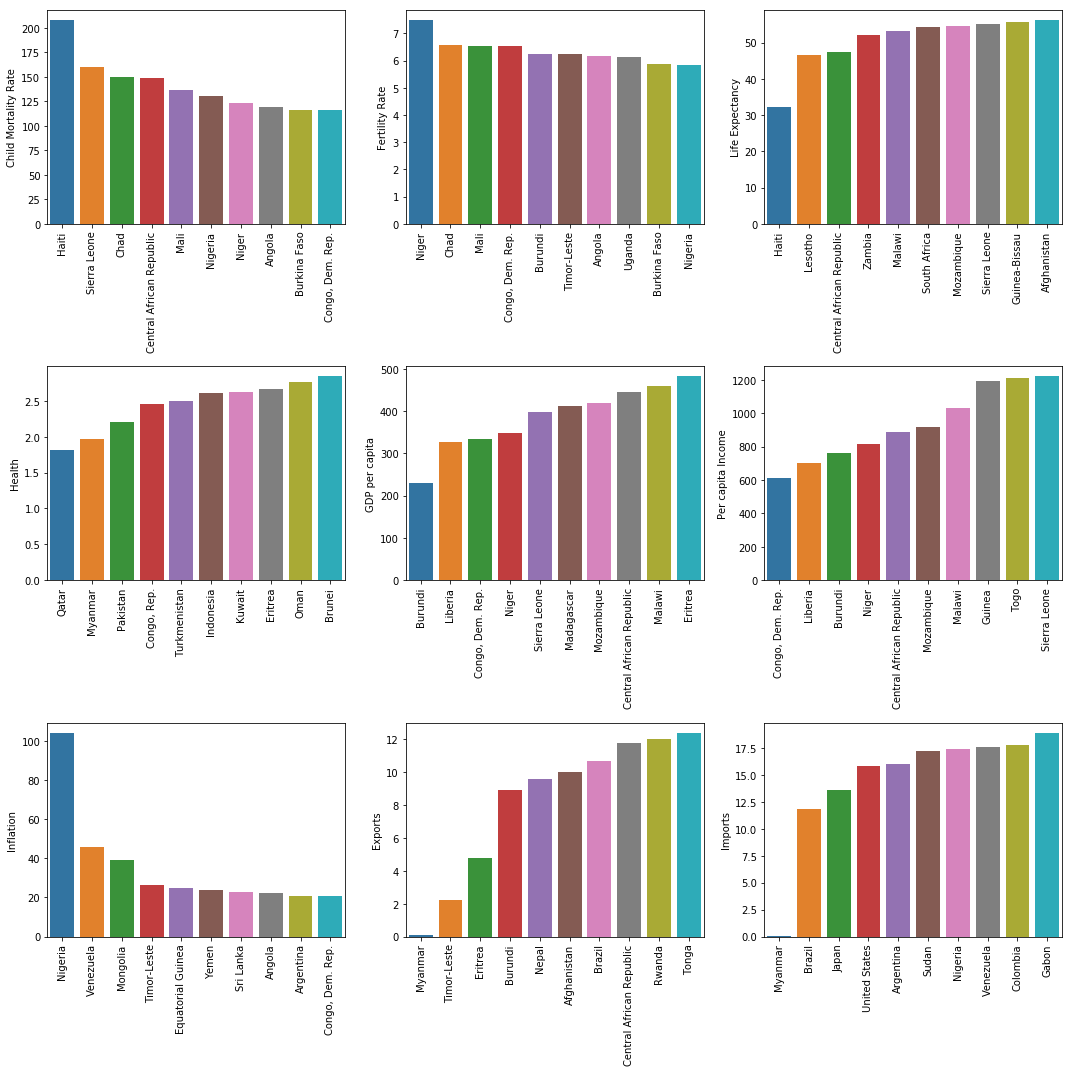

In [14]:
#finding out lowest 10 countries data 
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    

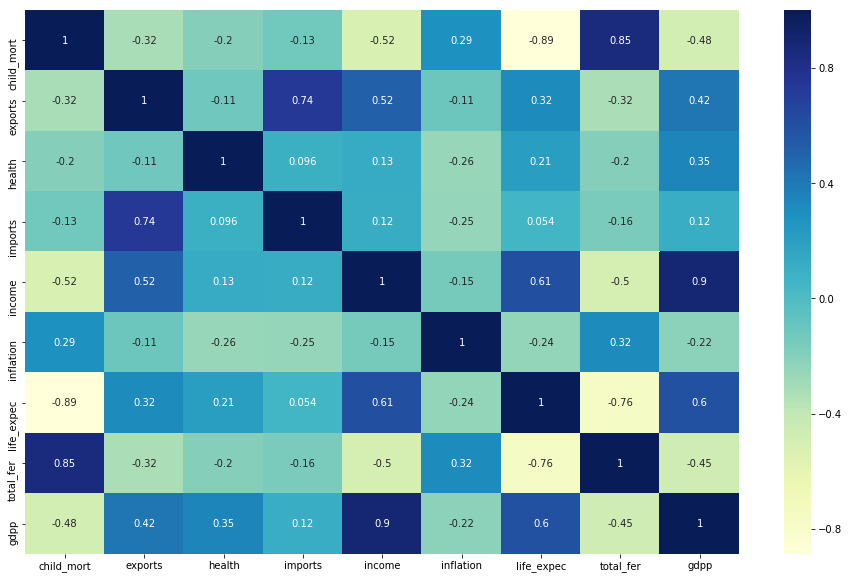

In [15]:
#Checking Correlation
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

## Box Plots for Checking Outliers in all factors 

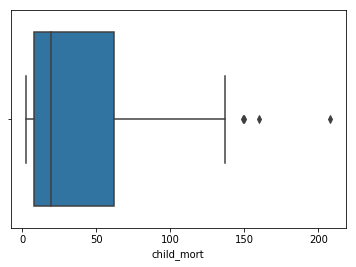

In [16]:
#Box Plot for Child Mortality
plt.show(sns.boxplot(data['child_mort']))

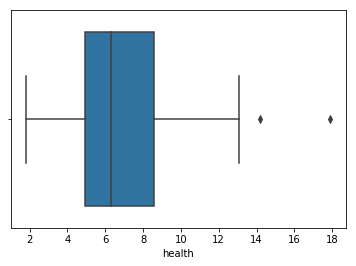

In [17]:
#Box Plot for Health
plt.show(sns.boxplot(data['health']))

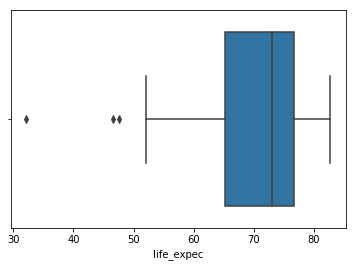

In [18]:
#Box Plot for life_expec
plt.show(sns.boxplot(data['life_expec']))

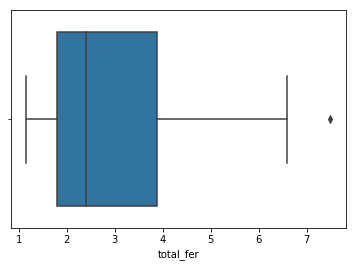

In [19]:
#Box Plot for total_fer
plt.show(sns.boxplot(data['total_fer']))

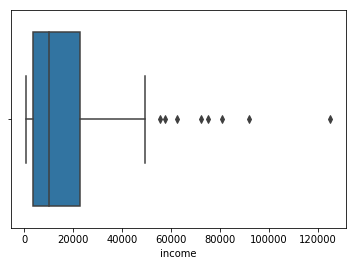

In [20]:
#Box Plot for income
plt.show(sns.boxplot(data['income']))

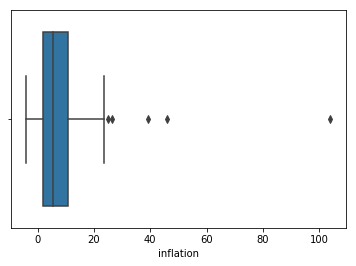

In [21]:
#Box Plot for inflation
plt.show(sns.boxplot(data['inflation']))

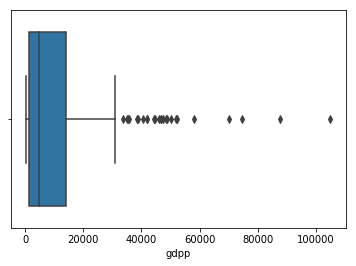

In [22]:
#Box Plot for gdpp
plt.show(sns.boxplot(data['gdpp']))

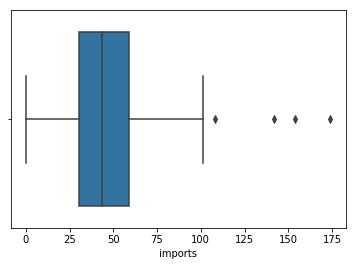

In [23]:
#Box Plot for imports
plt.show(sns.boxplot(data['imports']))

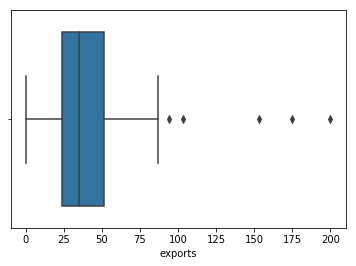

In [24]:
#Box Plot for exports
plt.show(sns.boxplot(data['exports']))

In [25]:
# For Removing Outliers from Data we need to have a copy of data
data2=data.copy()
data2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
# Removing Outliers from range 0.5-0.95 range
percent_range = data2['child_mort'].quantile([0.05,0.95]).values
data2['child_mort'][data2['child_mort'] <= percent_range[0]] = percent_range[0]
data2['child_mort'][data2['child_mort'] >= percent_range[1]] = percent_range[1]

percent_range = data2['health'].quantile([0.05,0.95]).values
data2['health'][data2['health'] <= percent_range[0]] = percent_range[0]
data2['health'][data2['health'] >= percent_range[1]] = percent_range[1]

percent_range = data2['life_expec'].quantile([0.05,0.95]).values
data2['life_expec'][data2['life_expec'] <= percent_range[0]] = percent_range[0]
data2['life_expec'][data2['life_expec'] >= percent_range[1]] = percent_range[1]

percent_range = data2['total_fer'].quantile([0.05,0.95]).values
data2['total_fer'][data2['total_fer'] <= percent_range[0]] = percent_range[0]
data2['total_fer'][data2['total_fer'] >= percent_range[1]] = percent_range[1]

percent_range = data2['income'].quantile([0.05,0.95]).values
data2['income'][data2['income'] <= percent_range[0]] = percent_range[0]
data2['income'][data2['income'] >= percent_range[1]] = percent_range[1]

percent_range = data2['inflation'].quantile([0.05,0.95]).values
data2['inflation'][data2['inflation'] <= percent_range[0]] = percent_range[0]
data2['inflation'][data2['inflation'] >= percent_range[1]] = percent_range[1]

percent_range = data2['gdpp'].quantile([0.05,0.95]).values
data2['gdpp'][data2['gdpp'] <= percent_range[0]] = percent_range[0]
data2['gdpp'][data2['gdpp'] >= percent_range[1]] = percent_range[1]

percent_range = data2['imports'].quantile([0.05,0.95]).values
data2['imports'][data2['imports'] <= percent_range[0]] = percent_range[0]
data2['imports'][data2['imports'] >= percent_range[1]] = percent_range[1]

percent_range = data2['exports'].quantile([0.05,0.95]).values
data2['exports'][data2['exports'] <= percent_range[0]] = percent_range[0]
data2['exports'][data2['exports'] >= percent_range[1]] = percent_range[1]




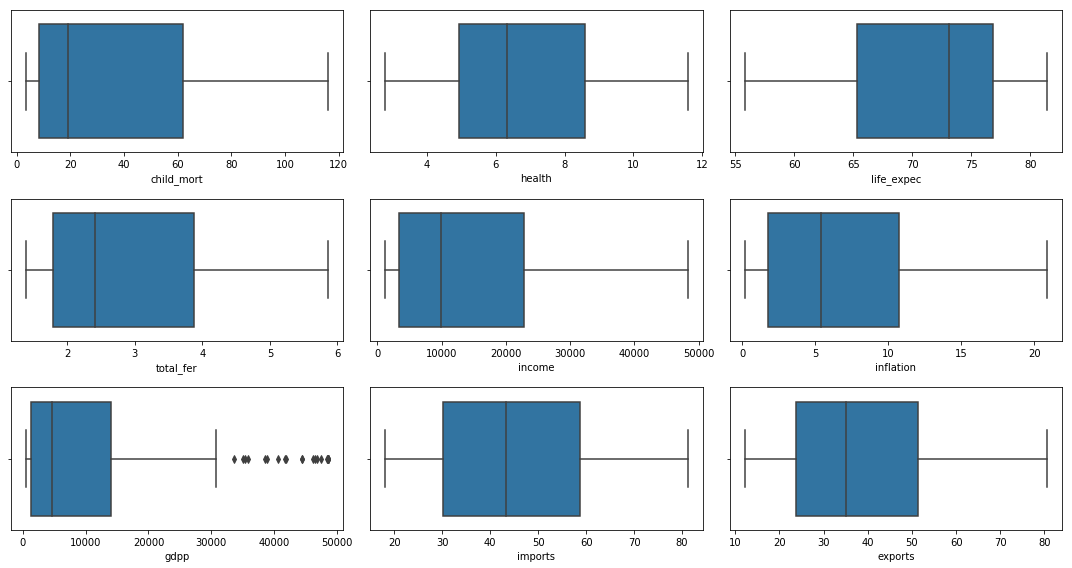

In [27]:

# Plotting Boxplot after outliers removal
fig,axs = plt.subplots(3,3, figsize = (15,8))
plt1 = sns.boxplot(data2['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data2['health'], ax = axs[0,1])
plt3 = sns.boxplot(data2['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data2['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data2['income'], ax = axs[1,1])
plt6 = sns.boxplot(data2['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data2['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data2['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data2['exports'], ax = axs[2,2])
plt.tight_layout()

# Scaling the dataset

In [28]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
datalist = ['child_mort','life_expec',  'health','total_fer', 'imports','exports', 'income', 'inflation', 'gdpp']
# Scale these variables using 'fit_transform'
data2[datalist] = scaler.fit_transform(data2[datalist])

# PRINCIPAL COMPONENT ANALYSIS

In [29]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [30]:
# Putting feature variable to X
X = data2.drop(['country'],axis=1)

# Putting response variable to y
y = data2['country']

In [31]:
#Doing the PCA on data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

## 3. Check the components:

In [32]:
# pca components
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [33]:
colnames = list(X.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
df_pca.head()

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income


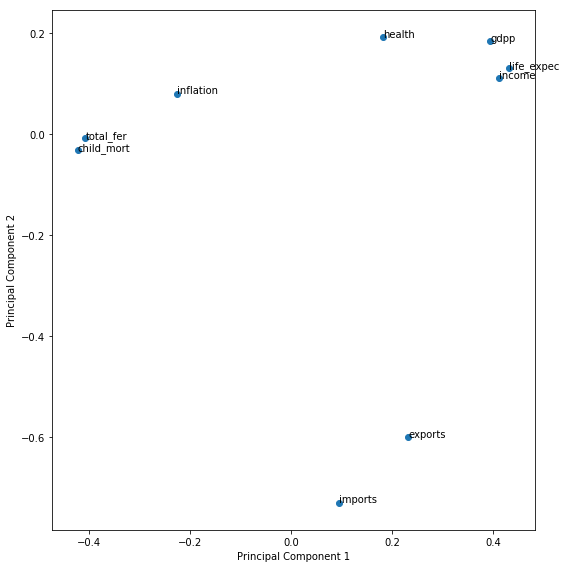

In [34]:
# Plot data
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca.Feature):
    plt.annotate(txt, (df_pca.PC1[i],df_pca.PC2[i]))
plt.tight_layout()
plt.show()

## 4. Check variance ratio:

In [35]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

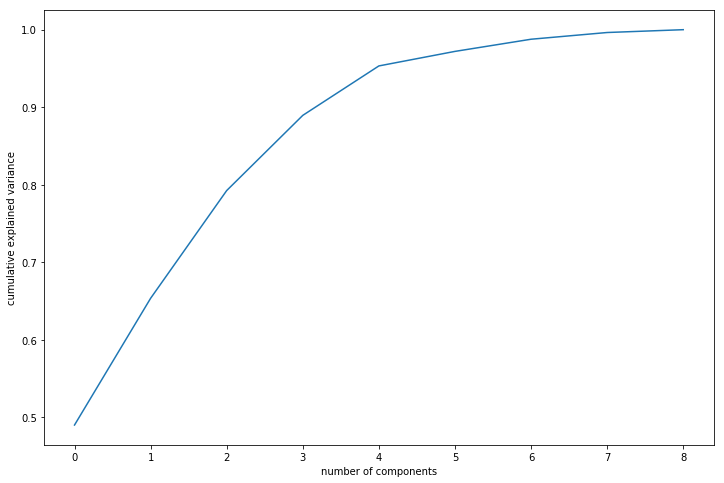

In [36]:
#Scree Plot-plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_num')
plt.show()

Plot curve showing that 4 component are enough for 95% variance 

In [37]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

# Transformation

In [38]:
pca_df = pca_final.fit_transform(X)
pca_df.shape

(167, 4)

In [39]:
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


### Correlation Matrix for checking PCA components correlation

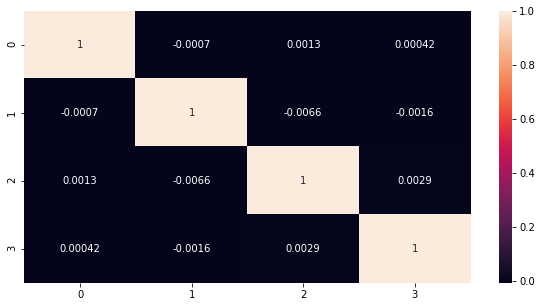

In [40]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df.transpose())
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True,)

In Correlation Matrix we can see less correlation among PCA components

# K-Means Clustering

In [41]:
#Import Kmeans Library
from sklearn.cluster import KMeans

## Hopkins Statistics

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

    If the value is between {0.01, ...,0.3}, the data is regularly spaced.

    If the value is around 0.5, it is random.

    If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
hopkins(pca_df)


0.7198044835549939

# K-Means with some K

In [44]:
# we are taking 5 Clusters here for K-Means
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Silhouette Analysis



silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)

𝑝

is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞

is the mean intra-cluster distance to all the points in its own cluster.

    The value of the silhouette score range lies between -1 to 1.

    A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [45]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df)
    sse_.append([k, silhouette_score(pca_df, kmeans.labels_)])

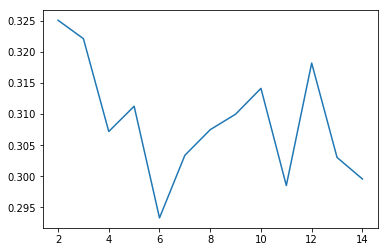

In [46]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

# Sum of Squared Distances

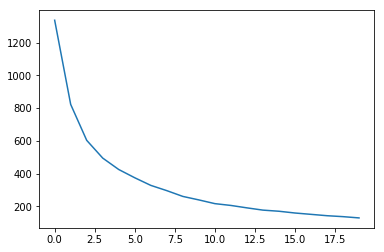

In [47]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [48]:
# analysis of clusters formed
data2.index = pd.RangeIndex(len(data2.index))
country_kmeans = pd.concat([data2, pd.Series(model_clus5.labels_)], axis=1)
country_kmeans.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income','inflation',
                          'life_expec', 'total_fer', 'gdpp','ClusterID']

kmeans_childmort = 	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).child_mort.mean())
kmeans_exports = 	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).exports.mean())
kmeans_health=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).health.mean())
kmeans_imports=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).imports.mean())
kmeans_income=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).income.mean())
kmeans_inflation=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).inflation.mean())
kmeans_life_expec=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).life_expec.mean())
kmeans_total_fer=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).total_fer.mean())
kmeans_gdpp=	pd.DataFrame(country_kmeans.groupby(["ClusterID"]).gdpp.mean())
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874,3
1,Albania,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775,2
2,Algeria,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286,0
3,Angola,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839,3
4,Antigua and Barbuda,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991,2


In [49]:
df= pd.concat([pd.Series([0,1,2,3,4]), kmeans_childmort, kmeans_exports, kmeans_health,kmeans_imports,
               kmeans_income,kmeans_inflation,kmeans_life_expec,kmeans_total_fer,kmeans_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean",
                "inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.073106,-0.592329,-0.634466,-0.920510,-0.331698,0.854297,0.034046,-0.122271,-0.462071
1,1,-0.798763,1.609867,-0.278002,0.926913,1.196032,-0.324357,0.846207,-0.733909,0.877487
2,2,-0.487370,0.133552,0.050170,0.557902,-0.340734,-0.404638,0.232759,-0.469210,-0.385798
3,3,1.498459,-0.504876,-0.069686,-0.098975,-0.827693,0.367961,-1.385011,1.424281,-0.676149
4,4,-0.898111,-0.163629,1.374423,-0.593101,1.571896,-0.862025,1.237952,-0.784053,1.942651


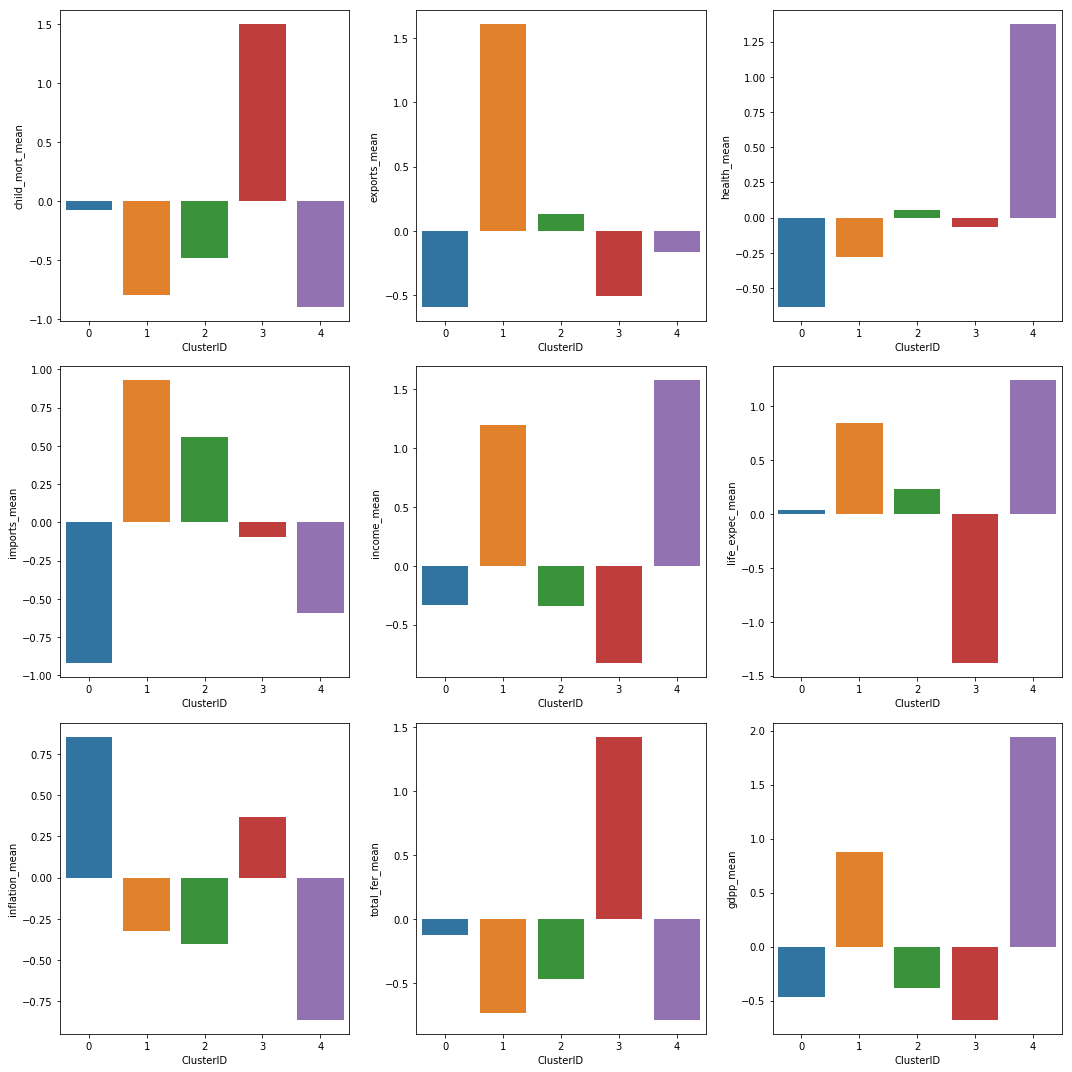

In [50]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

# Hierarchical clustering

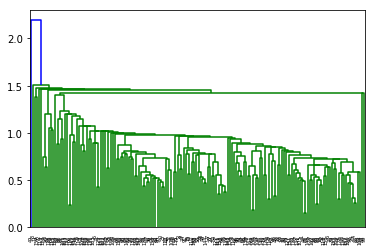

In [60]:
# heirarchical clustering
mergings = linkage(pca_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

Its not showing clear result so complete method can be use to get good result

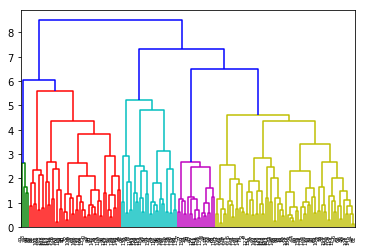

In [51]:
# heirarchical clustering
mergings = linkage(pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
# Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

In [53]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
pca_df_hc = pd.concat([pca_df, clusterCut], axis=1)
pca_df_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
pca_df_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [54]:
pca_cluster_hc = pd.concat([data2['country'],pca_df_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


In [55]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [56]:
hc_clusters_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [57]:
df_final = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df_final.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_final

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


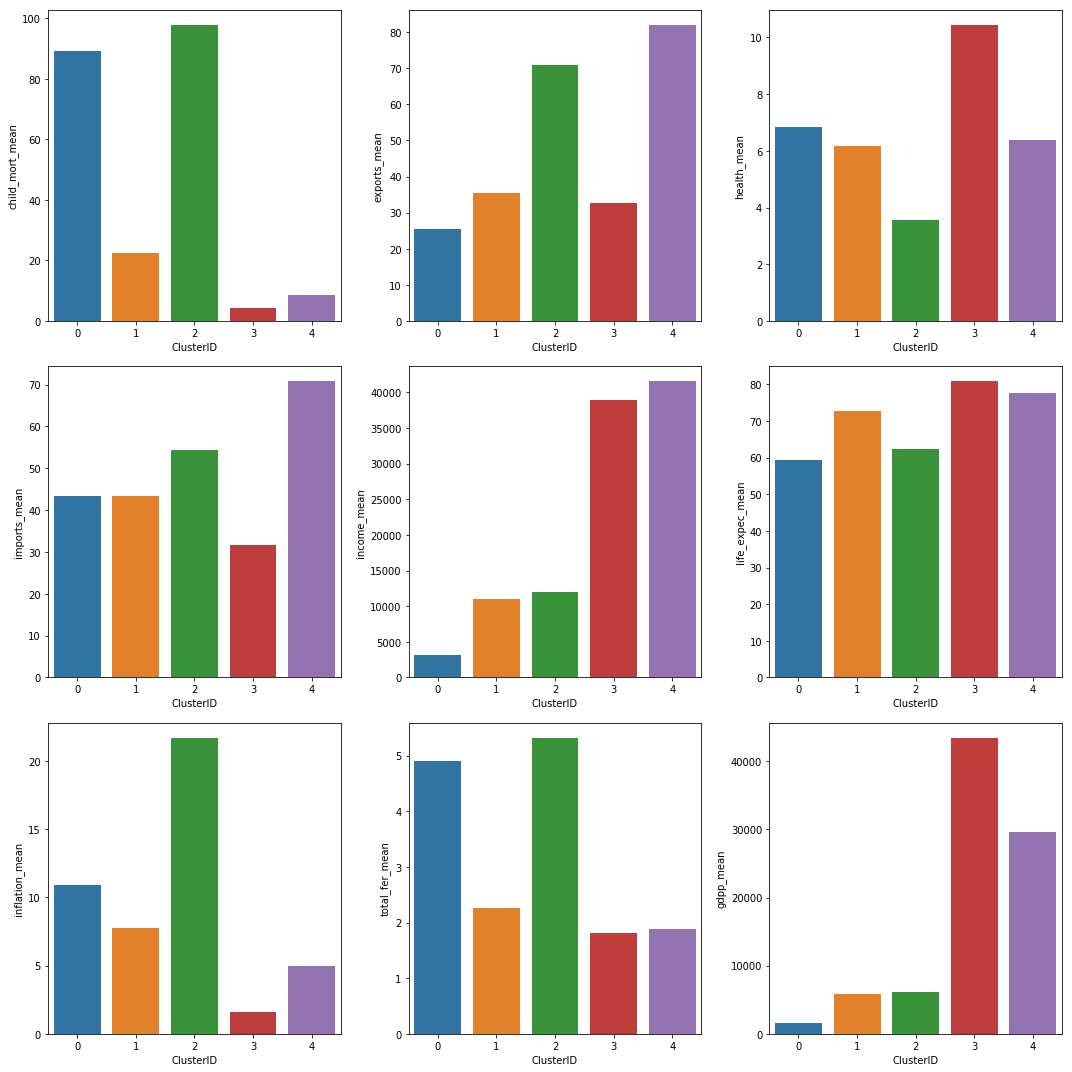

In [58]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df_final.ClusterID, y=df_final.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df_final.ClusterID, y=df_final.exports_mean, ax = axs[0,1])
sns.barplot(x=df_final.ClusterID, y=df_final.health_mean, ax = axs[0,2])
sns.barplot(x=df_final.ClusterID, y=df_final.imports_mean, ax = axs[1,0])
sns.barplot(x=df_final.ClusterID, y=df_final.income_mean, ax = axs[1,1])
sns.barplot(x=df_final.ClusterID, y=df_final.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df_final.ClusterID, y=df_final.inflation_mean, ax = axs[2,0])
sns.barplot(x=df_final.ClusterID, y=df_final.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df_final.ClusterID, y=df_final.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [59]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

# Recommendation

The Resultant countries list indicates that these countries are the most backward country in this dataset, with cluster_id zero.Company need to focus on these countries-

Afghanistan, Benin, Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', Uganda, Yemen, Zambia